In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Datasets/titanic.csv')

In [2]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
df.shape

(891, 12)

In [4]:
import matplotlib.pyplot as plt

df['Age'].hist(bins=16)
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
# How many age value are null
df['Age'].isna().sum()

177

In [6]:
# Parch is number of parrents or children on board
# Sibsp is number of siblings or spouses

In [7]:
# create new column as gender when sex is femail its zero when mail its one
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [8]:
df.shape

(891, 13)

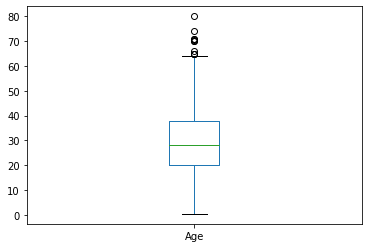

In [9]:
df['Age'].plot.box()

In [10]:
df['Age'].dropna().values

array([22.  , 38.  , 26.  , 35.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 31.  , 35.  ,
       34.  , 15.  , 28.  ,  8.  , 38.  , 19.  , 40.  , 66.  , 28.  ,
       42.  , 21.  , 18.  , 14.  , 40.  , 27.  ,  3.  , 19.  , 18.  ,
        7.  , 21.  , 49.  , 29.  , 65.  , 21.  , 28.5 ,  5.  , 11.  ,
       22.  , 38.  , 45.  ,  4.  , 29.  , 19.  , 17.  , 26.  , 32.  ,
       16.  , 21.  , 26.  , 32.  , 25.  ,  0.83, 30.  , 22.  , 29.  ,
       28.  , 17.  , 33.  , 16.  , 23.  , 24.  , 29.  , 20.  , 46.  ,
       26.  , 59.  , 71.  , 23.  , 34.  , 34.  , 28.  , 21.  , 33.  ,
       37.  , 28.  , 21.  , 38.  , 47.  , 14.5 , 22.  , 20.  , 17.  ,
       21.  , 70.5 , 29.  , 24.  ,  2.  , 21.  , 32.5 , 32.5 , 54.  ,
       12.  , 24.  , 45.  , 33.  , 20.  , 47.  , 29.  , 25.  , 23.  ,
       19.  , 37.  , 16.  , 24.  , 22.  , 24.  , 19.  , 18.  , 19.  ,
       27.  ,  9.  , 36.5 , 42.  , 51.  , 22.  , 55.5 , 40.5 , 51.  ,
       16.  , 30.  ,

In [11]:
len(df[ df['Embarked'] == 'C'])

168

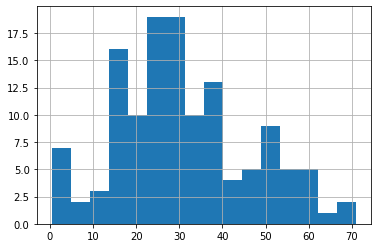

In [12]:
df[ df['Embarked'] == 'C']['Age'].hist(bins=16)
plt.show()

In [13]:
df[ df['Embarked'] == 'C']['Age'].min()
df[ df['Embarked'] == 'C']['Age'].max()

71.0

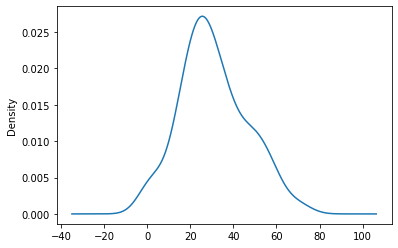

In [14]:
df[ df['Embarked'] == 'C']['Age'].plot(kind='kde')

In [15]:
ls_embarked = df['Embarked'].dropna().values

In [16]:
len(ls_embarked)

889

In [17]:
ls_embarked[:10]

array(['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C'], dtype=object)

In [18]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [19]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
hist = {}
for item in ls_embarked:
    hist[item] = hist.get(item, 0) + 1

In [21]:
df['Embarked'].value_counts()['S']

644

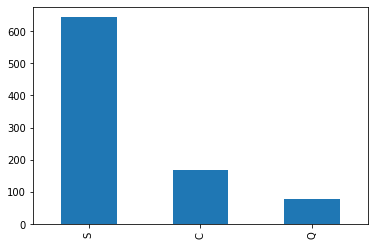

In [22]:
df['Embarked'].value_counts().plot(kind='bar')

In [23]:
df['Embarked'].value_counts().nunique()

3

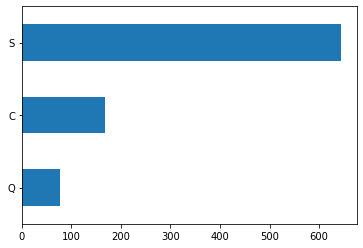

In [24]:
df['Embarked'].value_counts().plot(kind='barh').invert_yaxis()

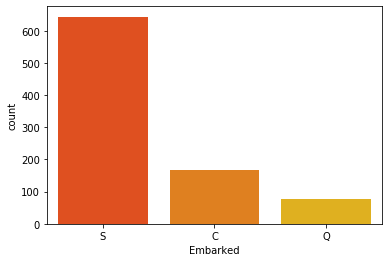

In [25]:
import seaborn as sns

sns.countplot(x='Embarked', palette='autumn', data=df)

In [26]:
sum(df['Gender'] == 0)  # total female

314

In [27]:
sum(df['Gender'] == 1)  # total Male

577

In [28]:
df.Sex.value_counts().to_json()

'{"male":577,"female":314}'

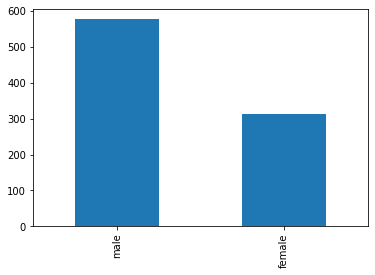

In [29]:
df.Sex.value_counts().plot(kind = 'bar')

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

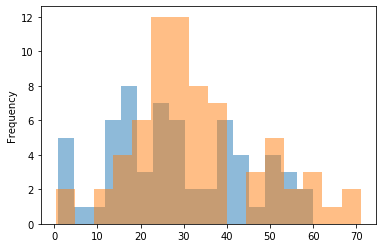

In [30]:
df[ df['Embarked'] == 'C'].groupby('Sex')['Age'].plot(kind='hist', bins=16, alpha=0.5)

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

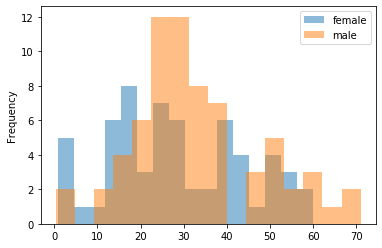

In [31]:
df[ df['Embarked'] == 'C'].groupby('Sex')['Age'].plot(kind='hist', bins=16, legend=True, alpha=0.5)

In [32]:
dict(df[ df['Embarked'] == 'C'].groupby('Sex')['Age'].value_counts())

{('female', 24.0): 5,
 ('female', 17.0): 3,
 ('female', 18.0): 3,
 ('female', 30.0): 3,
 ('female', 0.75): 2,
 ('female', 14.0): 2,
 ('female', 15.0): 2,
 ('female', 22.0): 2,
 ('female', 23.0): 2,
 ('female', 38.0): 2,
 ('female', 39.0): 2,
 ('female', 44.0): 2,
 ('female', 50.0): 2,
 ('female', 54.0): 2,
 ('female', 1.0): 1,
 ('female', 3.0): 1,
 ('female', 4.0): 1,
 ('female', 5.0): 1,
 ('female', 9.0): 1,
 ('female', 13.0): 1,
 ('female', 14.5): 1,
 ('female', 16.0): 1,
 ('female', 19.0): 1,
 ('female', 21.0): 1,
 ('female', 27.0): 1,
 ('female', 28.0): 1,
 ('female', 29.0): 1,
 ('female', 31.0): 1,
 ('female', 32.0): 1,
 ('female', 35.0): 1,
 ('female', 36.0): 1,
 ('female', 40.0): 1,
 ('female', 41.0): 1,
 ('female', 42.0): 1,
 ('female', 45.0): 1,
 ('female', 48.0): 1,
 ('female', 49.0): 1,
 ('female', 52.0): 1,
 ('female', 56.0): 1,
 ('female', 58.0): 1,
 ('female', 60.0): 1,
 ('male', 25.0): 4,
 ('male', 30.0): 4,
 ('male', 20.0): 3,
 ('male', 22.0): 3,
 ('male', 26.0): 3,
 ('

In [33]:
df[ df['Embarked'] == 'C'].groupby('Sex')['Age'].mean()

Sex
female    28.344262
male      32.998841
Name: Age, dtype: float64

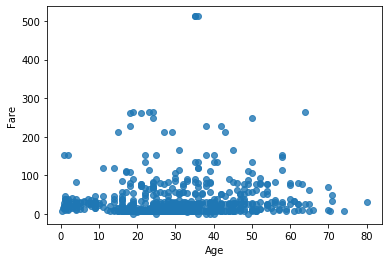

In [34]:
sns.regplot(x='Age', y='Fare', fit_reg=False, data=df)

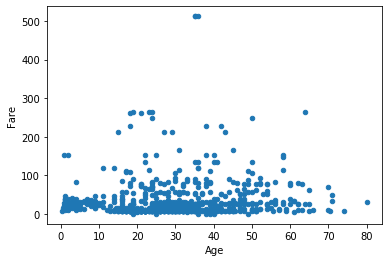

In [35]:
df.plot.scatter(x='Age', y='Fare')

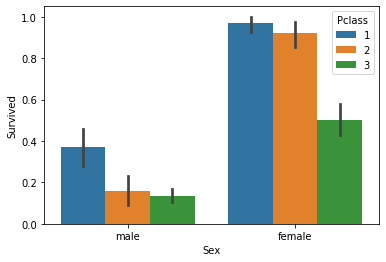

In [36]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df)

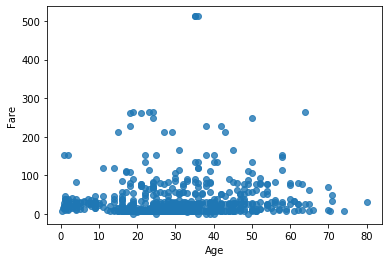

In [37]:
sns.regplot(x='Age', y='Fare', fit_reg=False, data=df)

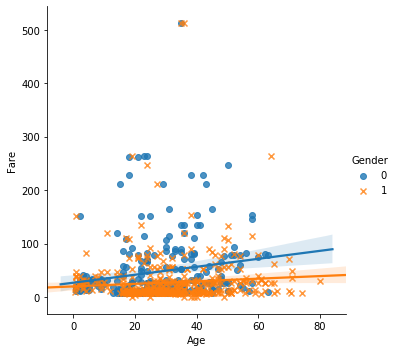

In [38]:
g = sns.lmplot(x="Age", y="Fare", hue="Gender", data=df, markers=["o", "x"])

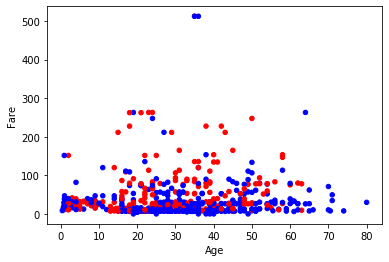

In [39]:
col = df['Sex'].map({'male':'b', 'female':'r'})
df.plot.scatter(x='Age', y='Fare', c=col, legend=True)

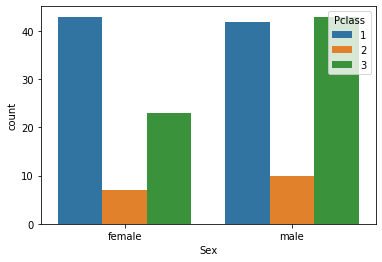

In [40]:
sns.countplot(x='Sex', hue="Pclass", data=df[df.Embarked=='C'])

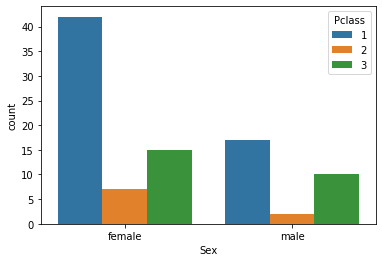

In [41]:
sns.countplot(x='Sex', hue="Pclass", data=df[(df.Embarked=='C') & (df.Survived== 1)])

In [42]:
df[(df['Sex']=='female') & (df['Pclass']==1)]

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
11            12         1       1   
31            32         1       1   
52            53         1       1   
..           ...       ...     ...   
856          857         1       1   
862          863         1       1   
871          872         1       1   
879          880         1       1   
887          888         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                                 ...     ...   ...    ...   
856         Wick, Mrs. George Dennick (Mary Hitchcock)  female  45.0      1   
862  Swift, Mrs. Frederick Joel (Margaret Welles Ba...  female  48.0      0   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0      1   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   

     Parch    Ticket      Fare Cabin Embarked  Gender  
1        0  PC 17599   71.2833   C85        C       0  
3        0    113803   53.1000  C123        S       0  
11       0    113783   26.5500  C103        S       0  
31       0  PC 17569  146.5208   B78        C       0  
52       0  PC 17572   76.7292   D33        C       0  
..     ...       ...       ...   ...      ...     ...  
856      1     36928  164.8667   NaN        S       0  
862      0     17466   25.9292   D17        S       0  
871      1     11751   52.5542   D35        S       0  
879      1     11767   83.1583   C50        C       0  
887      0    112053   30.0000   B42        S       0  

[94 rows x 13 columns]

In [43]:
survived_dic = dict(df[(df['Sex']=='female') & (df['Pclass']==1)]['Survived'].value_counts())
survived_dic

{1: 91, 0: 3}

In [44]:
total = df[(df.Sex == 'female') & (df.Pclass == 1)]
sur = total[df.Survived == 1].shape[0]
per = sur/(total.shape[0]) *100
per

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


96.80851063829788

In [45]:
91/(91+3)

0.9680851063829787

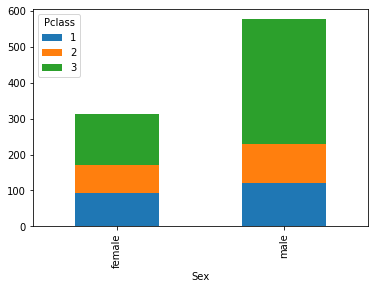

In [46]:
df.groupby(['Sex'])['Pclass'].value_counts().unstack().plot(kind='bar', stacked=True)

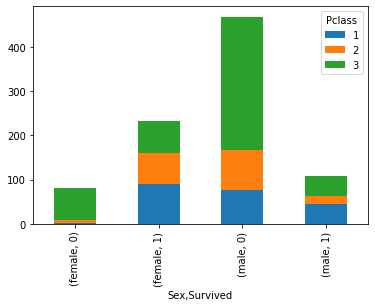

In [47]:
df.groupby(['Sex', 'Survived'])['Pclass'].value_counts().unstack().plot(kind='bar', stacked=True)

In [48]:
((df['Sex']=='female') & (df['Pclass']==2)).value_counts()

False    815
True      76
dtype: int64

In [49]:
76/(815+76)

0.08529741863075196

In [50]:
815/(815+76)

0.9147025813692481

In [51]:
((df['Sex']=='male') & (df['Pclass']==2)).value_counts()

False    783
True     108
dtype: int64

In [52]:
783/(783+108)

0.8787878787878788

In [53]:
108/(783+108)

0.12121212121212122

In [54]:
df[df['Pclass']==2]['Sex'].value_counts()

male      108
female     76
Name: Sex, dtype: int64

In [55]:
dict(df.groupby('Sex')['Pclass'].value_counts())

{('female', 3): 144,
 ('female', 1): 94,
 ('female', 2): 76,
 ('male', 3): 347,
 ('male', 1): 122,
 ('male', 2): 108}

In [56]:
pd.crosstab(df['Sex'], df['Pclass'] == 2)

Pclass  False  True 
Sex                 
female    238     76
male      469    108

In [57]:
pd.crosstab(df['Sex'], df['Pclass'])

Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347

In [58]:
pd.crosstab(df['Pclass'], df['Sex'])

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347

In [59]:
for x in df['Pclass'].unique():
    print(df[df['Pclass']==x]['Sex'].value_counts())

male      347
female    144
Name: Sex, dtype: int64
male      122
female     94
Name: Sex, dtype: int64
male      108
female     76
Name: Sex, dtype: int64


In [60]:
pd.crosstab(df['Sex'], df['Pclass'], normalize='index')

Pclass         1         2         3
Sex                                 
female  0.299363  0.242038  0.458599
male    0.211438  0.187175  0.601386

In [61]:
pd.crosstab(df['Pclass'], df['Sex'], normalize='index')

Sex       female      male
Pclass                    
1       0.435185  0.564815
2       0.413043  0.586957
3       0.293279  0.706721

In [62]:
pd.crosstab(df['Sex'], df['Embarked'], normalize='index')

Embarked         C         Q         S
Sex                                   
female    0.233974  0.115385  0.650641
male      0.164645  0.071057  0.764298

In [63]:
.2339+.1646

0.39849999999999997

In [64]:
pd.crosstab(df['Embarked'], df['Sex'], normalize='index')

Sex         female      male
Embarked                    
C         0.434524  0.565476
Q         0.467532  0.532468
S         0.315217  0.684783

In [65]:
print(dict(df['Embarked'].value_counts()))
dict(df['Embarked'].value_counts())['C']

{'S': 644, 'C': 168, 'Q': 77}


168

In [66]:
sum(dict(df['Embarked'].value_counts()).values())

889

In [67]:
# What Percentage of passangers Embarked from C
dict(df['Embarked'].value_counts())['C']/sum(dict(df['Embarked'].value_counts()).values())

0.1889763779527559

In [68]:
# What Percentage of passangers Embarked from C
len(df[df['Embarked']=='C'])/len(df['Embarked'].dropna())

0.1889763779527559

In [69]:
# What Percentage of female passangers Embarked from C
len(df[(df['Sex']=='female') & (df['Embarked']=='C')])/len(df[df['Sex']=='female'])

0.23248407643312102

In [70]:
# What is average age of male passangers that survived
(df[(df['Sex']=='male') & (df['Survived']==1)]['Age'].dropna()).mean()

27.276021505376345

In [71]:
import numpy as np
print(np.percentile(df['Fare'].values, 75))

31.0
